# Analysis of the sonic effects of music  
##### Author: Otuokere Tobechukwu. O 
##### Github: github.com/OtuokereTobechukwu

### Introduction

Music has been a wonder since time began. 
Don't try imagining Life without it. 

Frequently, very interesting questions pop up in my mind as regards how we humans percieve the sonic contents of music, how it affects us and how audio contents have evolved.

This is an attempt, through Exploratory Data Analysis, to explain how different elements of music correlate with each other.



## How is this analysis organized?

### Contents:
<ul><b>1. Data description</b></ul>
<ul><b>2. Importing essential libraries and dataset</b></ul>
<ul><b>3. Descriptive statistics</b></ul>
<ul><b>4. Data processing</b></ul>
<ul><b>5. Distrubution and correlation plots</b></ul>
<ul><b>6. Observations</b></ul>
<ul><b>7. How have things changed over time?</b></ul>

        
    
    


### Data description

Reference - https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/

    duration_ms - The duration of the track in milliseconds.
    
    key - The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.
    
    mode - Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
    
    time_signature - An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).
    acousticness - A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic. The distribution of values for this feature look like this: Acousticness 
    
    danceability - Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable. The distribution of values for this feature look like this: Danceability distribution
    
    energy - Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy. The distribution of values for this feature look like this: Energy distribution
    
    instrumentalness - Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0. The distribution of values for this feature look like this: Instrumentalness distribution
    
    liveness - Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live. The distribution of values for this feature look like this: Liveness distribution
    
    loudness - The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db. The distribution of values for this feature look like this: Loudness distribution
    
    speechiness - Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks. The distribution of values for this feature look like this: Speechiness distribution
    
    valence - A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry). The distribution of values for this feature look like this: Valence distribution
    
    tempo - The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration. The distribution of values for this feature look like this: Tempo 
    
    id - The Spotify ID for the track
    
    type - The object type: “audio_features”
    
    popularity - The popularity of the track. The value will be between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are. Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past. Artist and album popularity is derived mathematically from track popularity. Note that the popularity value may lag actual popularity by a few days: the value is not updated in real time

## Importing essential libraries and dataset

In [47]:
# Importing needed libraries
import time
import warnings
import pandas  as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt


Importing the dataset


In [48]:
dataset = pd.read_csv('data.csv')
ds_genre = pd.read_csv('data_by_genres.csv')
ds_artist = pd.read_csv('data_by_artist.csv')
ds_year = pd.read_csv('data_by_year.csv')
ds_genre2 = pd.read_csv('data_w_genres.csv')


# Overview of the dataset.
dataset.head()

,Unnamed: 0,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,8,1921,0.4150,60.936,0.9630,1921
1,1,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",5,1921,0.0366,80.954,0.0594,1921
2,2,0.996,['John McCormack'],0.518,159507,0.203,0,5uNZnElqOS3W4fRmRYPk4T,0.000000,0,0.115,-10.589,1,The Wearing of the Green,6,1921,0.0615,66.221,0.4060,1921
3,3,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,1SCWBjhk5WmXPxhDduD3HM,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954,0.0594,1921
4,4,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,4,1921,0.0380,101.665,0.2530,1921


### Descriptive Statistics

In [49]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168592 entries, 0 to 168591
Data columns (total 20 columns):
Unnamed: 0          168592 non-null int64
acousticness        168592 non-null float64
artists             168592 non-null object
danceability        168592 non-null float64
duration_ms         168592 non-null int64
energy              168592 non-null float64
explicit            168592 non-null int64
id                  168592 non-null object
instrumentalness    168592 non-null float64
key                 168592 non-null int64
liveness            168592 non-null float64
loudness            168592 non-null float64
mode                168592 non-null int64
name                168592 non-null object
popularity          168592 non-null int64
release_date        168592 non-null object
speechiness         168592 non-null float64
tempo               168592 non-null float64
valence             168592 non-null float64
year                168592 non-null int64
dtypes: float64(9), int64(7

In [50]:
# Descriptive statistics of the dataset
dataset.describe()


,Unnamed: 0,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,168592.000000,168592.000000,168592.000000,1.685920e+05,168592.000000,168592.000000,168592.000000,168592.000000,168592.000000,168592.000000,168592.000000,168592.000000,168592.000000,168592.000000,168592.000000,168592.000000
mean,84295.500000,0.501360,0.533648,2.327016e+05,0.488577,0.071516,0.169476,5.196795,0.205151,-11.358180,0.709446,31.626862,0.083616,116.918295,0.528497,1977.457774
std,48668.462629,0.377993,0.175919,1.223921e+05,0.267346,0.257685,0.315383,3.504587,0.175896,5.670176,0.454019,21.393260,0.119917,30.726527,0.264457,25.406757
min,0.000000,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1921.000000
25%,42147.750000,0.097800,0.412000,1.721600e+05,0.265000,0.000000,0.000000,2.000000,0.098200,-14.388000,0.000000,13.000000,0.034800,93.500750,0.315000,1957.000000
50%,84295.500000,0.515000,0.543000,2.091330e+05,0.480000,0.000000,0.000264,5.000000,0.134000,-10.466000,1.000000,34.000000,0.044600,114.795000,0.539000,1978.000000
75%,126443.250000,0.896000,0.662000,2.637070e+05,0.709000,0.000000,0.111000,8.000000,0.259000,-7.135000,1.000000,48.000000,0.072300,135.733500,0.749000,1999.000000
max,168591.000000,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.968000,244.091000,1.000000,2020.000000


### A little data processing ...

The first column in the dataframe is not essential for this analysis.

Also, we won't be needing the categorical columns just yet so we are going to drop them. 

In [51]:
# Dropping the First column

dataset = dataset.drop(columns = dataset.columns[0])


In [52]:
# Dropping all categorical variables

cat_cols = ['artists', 'name', 'id']
numeric_cols = dataset.drop(columns=cat_cols)
numeric_cols.head()


,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,release_date,speechiness,tempo,valence,year
0,0.732,0.819,180533,0.341,0,0.000000,7,0.160,-12.441,1,8,1921,0.4150,60.936,0.9630,1921
1,0.982,0.279,831667,0.211,0,0.878000,10,0.665,-20.096,1,5,1921,0.0366,80.954,0.0594,1921
2,0.996,0.518,159507,0.203,0,0.000000,0,0.115,-10.589,1,6,1921,0.0615,66.221,0.4060,1921
3,0.982,0.279,831667,0.211,0,0.878000,10,0.665,-20.096,1,4,1921,0.0366,80.954,0.0594,1921
4,0.957,0.418,166693,0.193,0,0.000002,3,0.229,-10.096,1,4,1921,0.0380,101.665,0.2530,1921


In terms of the duration of songs, the millisecond is the unit of measurement in this dataset

We'll need to convert that to minutes to get a more representative idea

In [53]:
numeric_cols['duration_mins'] = (numeric_cols['duration_ms']/(1000*60))%60
numeric_cols = numeric_cols.drop(columns = ['duration_ms'])
numeric_cols.head()

,acousticness,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,release_date,speechiness,tempo,valence,year,duration_mins
0,0.732,0.819,0.341,0,0.000000,7,0.160,-12.441,1,8,1921,0.4150,60.936,0.9630,1921,3.008883
1,0.982,0.279,0.211,0,0.878000,10,0.665,-20.096,1,5,1921,0.0366,80.954,0.0594,1921,13.861117
2,0.996,0.518,0.203,0,0.000000,0,0.115,-10.589,1,6,1921,0.0615,66.221,0.4060,1921,2.658450
3,0.982,0.279,0.211,0,0.878000,10,0.665,-20.096,1,4,1921,0.0366,80.954,0.0594,1921,13.861117
4,0.957,0.418,0.193,0,0.000002,3,0.229,-10.096,1,4,1921,0.0380,101.665,0.2530,1921,2.778217


Now that has been dropped. Let's get visual!

Let's begin by showcasing the distrubution of the sonic features in this dataset

### Distrubution of the sonic features

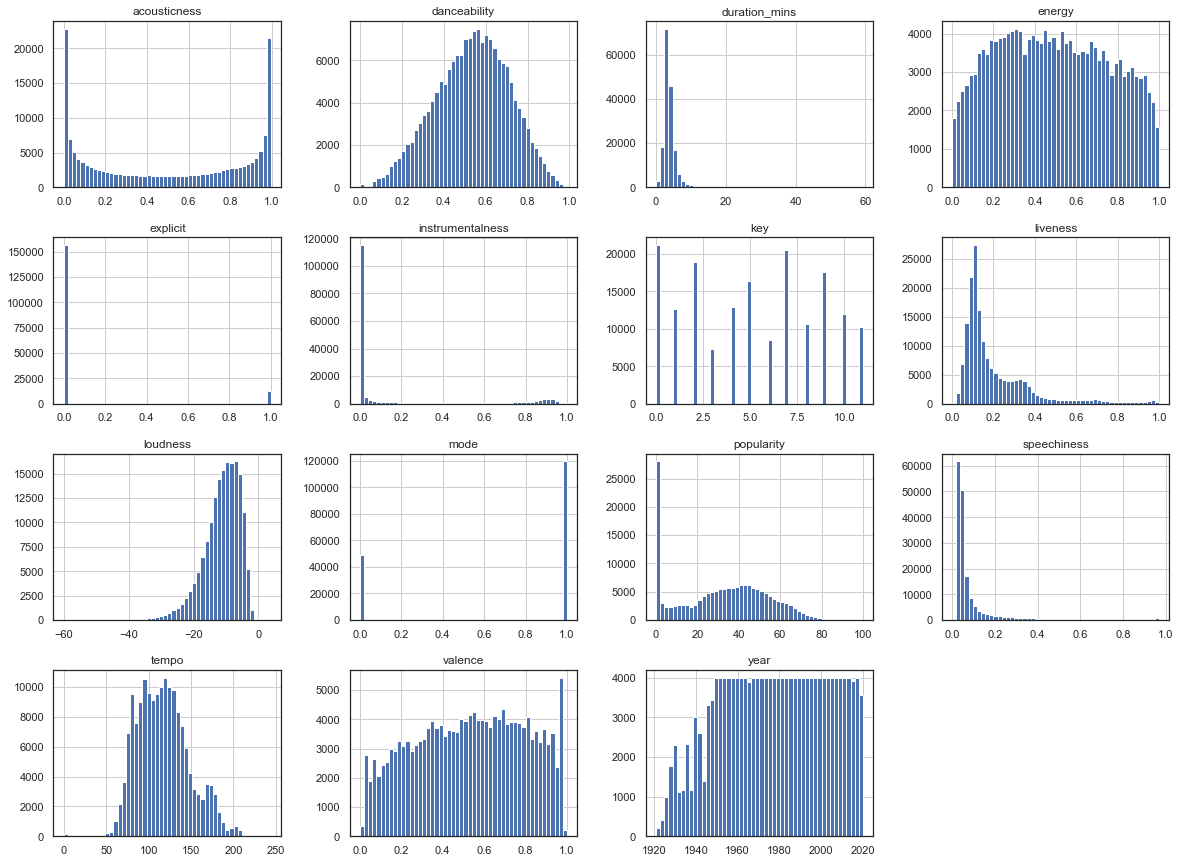

In [54]:
%matplotlib inline 
import matplotlib.pyplot as plt
numeric_cols.hist(bins=50, figsize=(20,15))
plt.show()

The above visual showcases the distrubution of the sonic features in this dataset. 

Let's briefly highlight some of the striking patterns we can observe here:

#### Danceability
This feature is normally distrubuted with the values centered around the mean(0.53). A little outlier exists on the left of the distrubution curve which indicates that a few songs were not danceable at all. I wonder what that sounds like. 

#### Duration(minutes)
A lot of songs appear to be within 2-6 minutes mark with a few exceptions lasting up to about 12-15 mins. Pretty long isn't it?

#### Energy
Energy seems to be fairly uniformly distrubuted

#### Loudness

#### Tempo 
Measured in Beats Per Minute(bpm), this feature apppears to be fairly normally distrubuted with most songs falling between 70bpm - 150bpm

#### Next, we take a look at the correlation between features in this dataset.

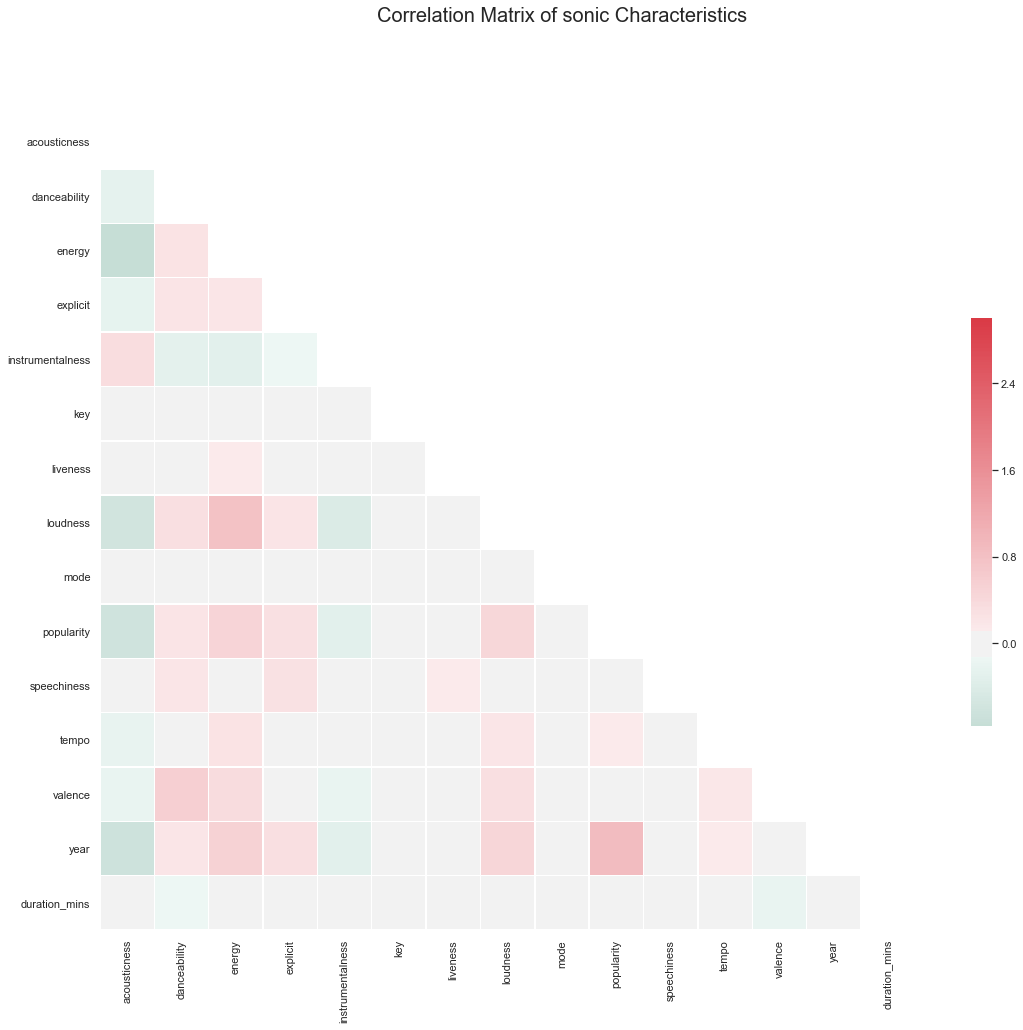

In [55]:
# A seaborn Correlation matrix

sns.set(style = "white", font_scale = 1)

corr = numeric_cols.corr()

mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize = (20, 15))
f.suptitle('Correlation Matrix of sonic Characteristics', fontsize = 20)


cmap = sns.diverging_palette(520, 10, as_cmap= True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax= 3, center = 0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()


### Observations from the correlation visual

Let's talk about them in two categories: Negative and Positive correlations

#### Negative correlations
<ul>Our first observation here highlights the strong negative correlation between the "year" and "acousticness" features. 
This simply means that as years pass, the acousticness of songs/music reduce drastically.</ul>

<ul>Likewise, in the same manner, the "acousticness" and "energy" features have a strong negative correlation for obvious reasons.
The more energetic a song is, the less likely it is to be acoustic.</ul>

<ul>A couple of other features like acousticness and loudness, acousticness and popularity share same sentiments.</ul>

#### Positive correlations
<ul>The strongest positive correlation we have in the figure above is between "popularity" and "year" features.
The advent of the internet should be one of the major contributing factors to this interesting observation. Music has been able to spread faster and reach an unending variety of listeners hence contributing to the popularity of both the song and the artist.</ul>

<ul>Another noteworthy observation to point out is the strong correlation between <b>"energy" and "loudness".</b></ul>

<ul>Also, there is an interesting correlation between year and explicit content. This is not surprising given the amount of sexual content on display in recent years. In terms of loudness, the correlation plot also establishes the relationship between advancing years and the loudness of the music being produced



For a more granular view of the correlation between features, 

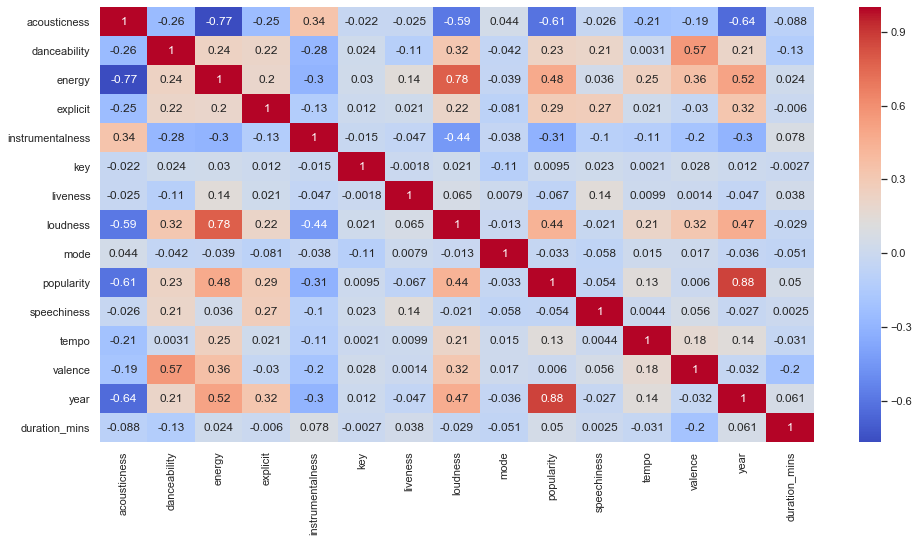

In [56]:
plt.figure(figsize=(16, 8))
sns.set(style = "white", font_scale = 1)

corr = numeric_cols.corr()



sns.heatmap(corr, annot=True, cmap="coolwarm")
#plt.show()


### Now let's shift our focus to more specific sonic properties 

First, we gather the necessary features:

In [57]:
popularity = numeric_cols['popularity']
sonic_features = numeric_cols.drop(columns=['danceability', 'key',
                                              'mode', 'popularity', 'year',
                                              'valence','explicit', 'release_date', 'speechiness'])
sonic_features.head()

,acousticness,energy,instrumentalness,liveness,loudness,tempo,duration_mins
0,0.732,0.341,0.000000,0.160,-12.441,60.936,3.008883
1,0.982,0.211,0.878000,0.665,-20.096,80.954,13.861117
2,0.996,0.203,0.000000,0.115,-10.589,66.221,2.658450
3,0.982,0.211,0.878000,0.665,-20.096,80.954,13.861117
4,0.957,0.193,0.000002,0.229,-10.096,101.665,2.778217


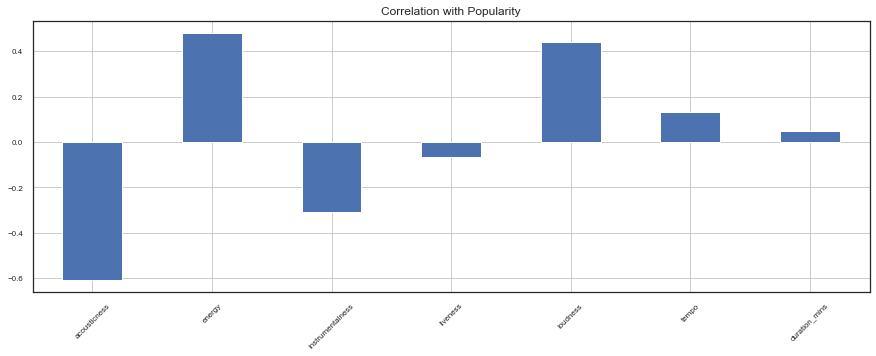

In [58]:
#Correlation visual
sonic_features.corrwith(popularity).plot.bar(figsize= (15,5),
                                          title = "Correlation with Popularity",
                                          fontsize= 8, rot = 45,
                                         grid = True) 
plt.show()


## How have things changed overtime?

To answer this question, we need to make some plots and see how some of these features have changed overtime.

This dataset as we know contains records from as far back as 1921. A bird's eye view of these features will show exactly how things have changed.



First we find the average of these features per year:


In [59]:
# A function to compute the averages

def year_average(cols, df):
    return df[cols].groupby('year').mean().sort_values(by='year').reset_index()

columns = ['acousticness', 'energy', 'instrumentalness', 'loudness', 'duration_mins', 'danceability', 'explicit', 'year']

year_avg_df = year_average(columns, numeric_cols)
year_avg_df.head()

,year,acousticness,energy,instrumentalness,loudness,duration_mins,danceability,explicit
0,1921,0.895823,0.236784,0.322330,-17.095437,3.831865,0.425661,0.054688
1,1922,0.939236,0.237026,0.440470,-19.179958,2.798409,0.480000,0.000000
2,1923,0.976329,0.246936,0.401932,-14.373882,2.972605,0.568462,0.000000
3,1924,0.935369,0.348118,0.582810,-14.156725,3.081525,0.549403,0.000000
4,1925,0.965422,0.264373,0.408893,-14.516707,3.068845,0.571890,0.000000


A line chart for the previous dataframe......

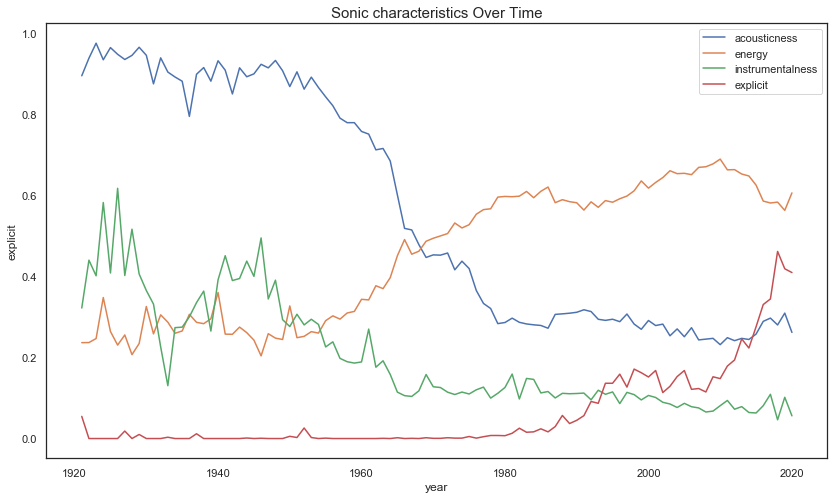

In [60]:


plt.figure(figsize=(14,8))

plt.title("Sonic characteristics Over Time", fontsize=15)
chart_lines = ['acousticness', 'energy', 'instrumentalness', 'explicit']

for line in chart_lines:
    ax = sns.lineplot(x='year', y=line, data=year_avg_df)

plt.legend(chart_lines)